# Model Evaluation Notebook

In [3]:
import sys
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Add the parent directory to the system path
sys.path.append(os.path.abspath(".."))

# Now import your function correctly
from src.create_sequences import create_sequences


In [4]:
df = pd.read_csv('../data/traffic_cleaned.csv')
features = ['Vehicle_Count', 'Traffic_Speed_kmh', 'Road_Occupancy_%']
target = 'Traffic_Speed_kmh'

In [5]:
scaler_X = pickle.load(open('../models/traffic_lstm_scaler_X.pkl', 'rb'))
scaler_y = pickle.load(open('../models/traffic_lstm_scaler_y.pkl', 'rb'))
model = load_model('../models/traffic_lstm_model.h5')


In [6]:
scaled_X = scaler_X.transform(df[features])
scaled_y = scaler_y.transform(df[[target]])
X, y = create_sequences(scaled_X, 10)
y_true = y[:, 1].reshape(-1, 1)

In [7]:
y_pred = model.predict(X)

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step


In [8]:
y_true = scaler_y.inverse_transform(y_true)
y_pred = scaler_y.inverse_transform(y_pred)

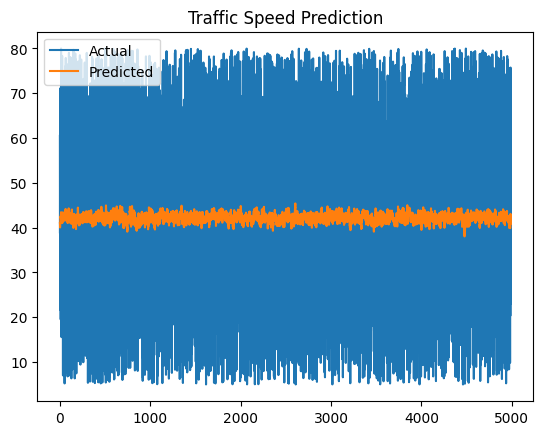

In [9]:
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Traffic Speed Prediction')
plt.savefig('../models/evaluation_plot.png')
plt.show()

In [12]:
y_pred = model.predict(X)

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_true_inv = scaler_y.inverse_transform(y_true)
y_pred_inv = scaler_y.inverse_transform(y_pred)

# 📊 Calculate evaluation metrics
mae = mean_absolute_error(y_true_inv, y_pred_inv)
mse = mean_squared_error(y_true_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_true_inv, y_pred_inv)


MAE: 3121.46
MSE: 12391806.59
RMSE: 3520.20
R² Score: -3.68


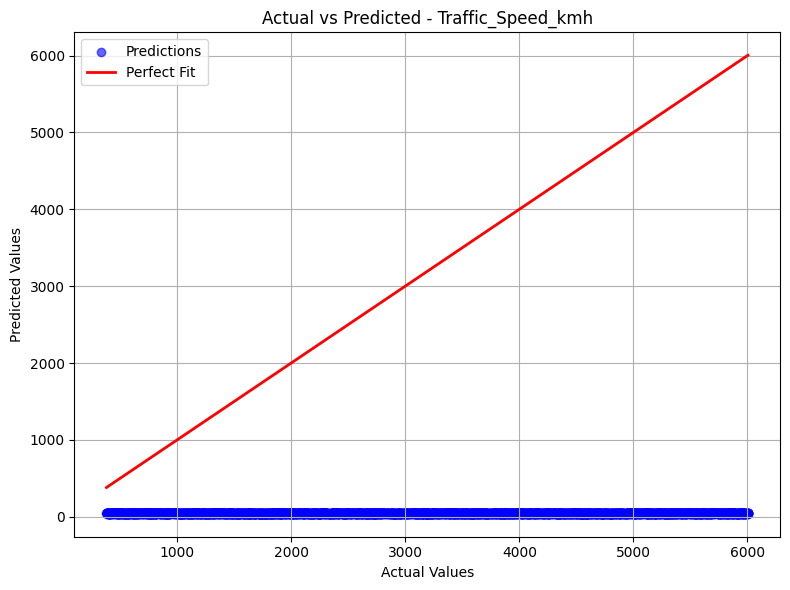

In [19]:
# If not already set
target_metric = 'Traffic_Speed_kmh'  # Replace with your actual target

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

actual = y_true_inv.flatten()
predicted = y_pred_inv.flatten()

# Compute evaluation metrics
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(actual, predicted)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(actual, predicted, color='blue', label='Predictions', alpha=0.6)
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r-', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs Predicted - {target_metric}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/Users/aaridhi0301/Downloads/smart_traffic_forecasting_with_notebooks/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


  1%|          | 1/100 [00:00<00:30,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


  2%|▏         | 2/100 [00:00<00:27,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step


  3%|▎         | 3/100 [00:00<00:27,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step


  4%|▍         | 4/100 [00:01<00:26,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


  5%|▌         | 5/100 [00:01<00:25,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step


  6%|▌         | 6/100 [00:01<00:25,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step


  7%|▋         | 7/100 [00:01<00:24,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step


  8%|▊         | 8/100 [00:02<00:24,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step


  9%|▉         | 9/100 [00:02<00:25,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


 10%|█         | 10/100 [00:02<00:25,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step


 11%|█         | 11/100 [00:03<00:24,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step


 12%|█▏        | 12/100 [00:03<00:24,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step


 13%|█▎        | 13/100 [00:03<00:24,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step


 14%|█▍        | 14/100 [00:03<00:24,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step


 15%|█▌        | 15/100 [00:04<00:24,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step


 16%|█▌        | 16/100 [00:04<00:23,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step


 17%|█▋        | 17/100 [00:04<00:23,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step


 18%|█▊        | 18/100 [00:04<00:22,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step


 19%|█▉        | 19/100 [00:05<00:22,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step


 20%|██        | 20/100 [00:05<00:23,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step


 21%|██        | 21/100 [00:05<00:22,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


 22%|██▏       | 22/100 [00:06<00:21,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step


 23%|██▎       | 23/100 [00:06<00:21,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step


 24%|██▍       | 24/100 [00:06<00:20,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step


 25%|██▌       | 25/100 [00:06<00:20,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step


 26%|██▌       | 26/100 [00:07<00:19,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


 27%|██▋       | 27/100 [00:07<00:19,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step


 28%|██▊       | 28/100 [00:07<00:19,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step


 29%|██▉       | 29/100 [00:08<00:19,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step


 30%|███       | 30/100 [00:08<00:19,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step


 31%|███       | 31/100 [00:08<00:19,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step


 32%|███▏      | 32/100 [00:08<00:19,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step


 33%|███▎      | 33/100 [00:09<00:19,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step


 34%|███▍      | 34/100 [00:09<00:18,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step


 35%|███▌      | 35/100 [00:09<00:18,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step


 36%|███▌      | 36/100 [00:10<00:17,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


 37%|███▋      | 37/100 [00:10<00:17,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


 38%|███▊      | 38/100 [00:10<00:16,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step


 39%|███▉      | 39/100 [00:10<00:16,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step


 40%|████      | 40/100 [00:11<00:16,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step


 41%|████      | 41/100 [00:11<00:16,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


 42%|████▏     | 42/100 [00:11<00:15,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


 43%|████▎     | 43/100 [00:11<00:15,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step


 44%|████▍     | 44/100 [00:12<00:15,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step


 45%|████▌     | 45/100 [00:12<00:14,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step


 46%|████▌     | 46/100 [00:12<00:14,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step


 47%|████▋     | 47/100 [00:13<00:14,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step


 48%|████▊     | 48/100 [00:13<00:14,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


 49%|████▉     | 49/100 [00:13<00:13,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step


 50%|█████     | 50/100 [00:13<00:13,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step


 51%|█████     | 51/100 [00:14<00:14,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step


 52%|█████▏    | 52/100 [00:14<00:13,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step


 53%|█████▎    | 53/100 [00:14<00:13,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step


 54%|█████▍    | 54/100 [00:14<00:12,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


 55%|█████▌    | 55/100 [00:15<00:12,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step


 56%|█████▌    | 56/100 [00:15<00:11,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step


 57%|█████▋    | 57/100 [00:15<00:11,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step


 58%|█████▊    | 58/100 [00:16<00:11,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step


 59%|█████▉    | 59/100 [00:16<00:11,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step


 60%|██████    | 60/100 [00:16<00:10,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step


 61%|██████    | 61/100 [00:16<00:10,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


 62%|██████▏   | 62/100 [00:17<00:10,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step


 63%|██████▎   | 63/100 [00:17<00:10,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step


 64%|██████▍   | 64/100 [00:17<00:10,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step


 65%|██████▌   | 65/100 [00:17<00:09,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


 66%|██████▌   | 66/100 [00:18<00:09,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step


 67%|██████▋   | 67/100 [00:18<00:09,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step


 68%|██████▊   | 68/100 [00:18<00:08,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


 69%|██████▉   | 69/100 [00:19<00:08,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step


 70%|███████   | 70/100 [00:19<00:08,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step


 71%|███████   | 71/100 [00:19<00:07,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step


 72%|███████▏  | 72/100 [00:19<00:07,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step


 73%|███████▎  | 73/100 [00:20<00:07,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step


 74%|███████▍  | 74/100 [00:20<00:07,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step


 75%|███████▌  | 75/100 [00:20<00:06,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step


 76%|███████▌  | 76/100 [00:21<00:06,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step


 77%|███████▋  | 77/100 [00:21<00:06,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step


 78%|███████▊  | 78/100 [00:21<00:06,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step


 79%|███████▉  | 79/100 [00:21<00:05,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step


 80%|████████  | 80/100 [00:22<00:05,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


 81%|████████  | 81/100 [00:22<00:05,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step


 82%|████████▏ | 82/100 [00:22<00:04,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step


 83%|████████▎ | 83/100 [00:22<00:04,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


 84%|████████▍ | 84/100 [00:23<00:04,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step


 85%|████████▌ | 85/100 [00:23<00:04,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step


 86%|████████▌ | 86/100 [00:23<00:03,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step


 87%|████████▋ | 87/100 [00:24<00:03,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step


 88%|████████▊ | 88/100 [00:24<00:03,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


 89%|████████▉ | 89/100 [00:24<00:02,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


 90%|█████████ | 90/100 [00:24<00:02,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step


 91%|█████████ | 91/100 [00:25<00:02,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step


 92%|█████████▏| 92/100 [00:25<00:02,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step


 93%|█████████▎| 93/100 [00:25<00:01,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step


 94%|█████████▍| 94/100 [00:25<00:01,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step


 95%|█████████▌| 95/100 [00:26<00:01,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step


 96%|█████████▌| 96/100 [00:26<00:01,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step


 97%|█████████▋| 97/100 [00:26<00:00,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step


 98%|█████████▊| 98/100 [00:27<00:00,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step


 99%|█████████▉| 99/100 [00:27<00:00,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


100%|██████████| 100/100 [00:27<00:00,  3.63it/s]


<Figure size 640x480 with 0 Axes>

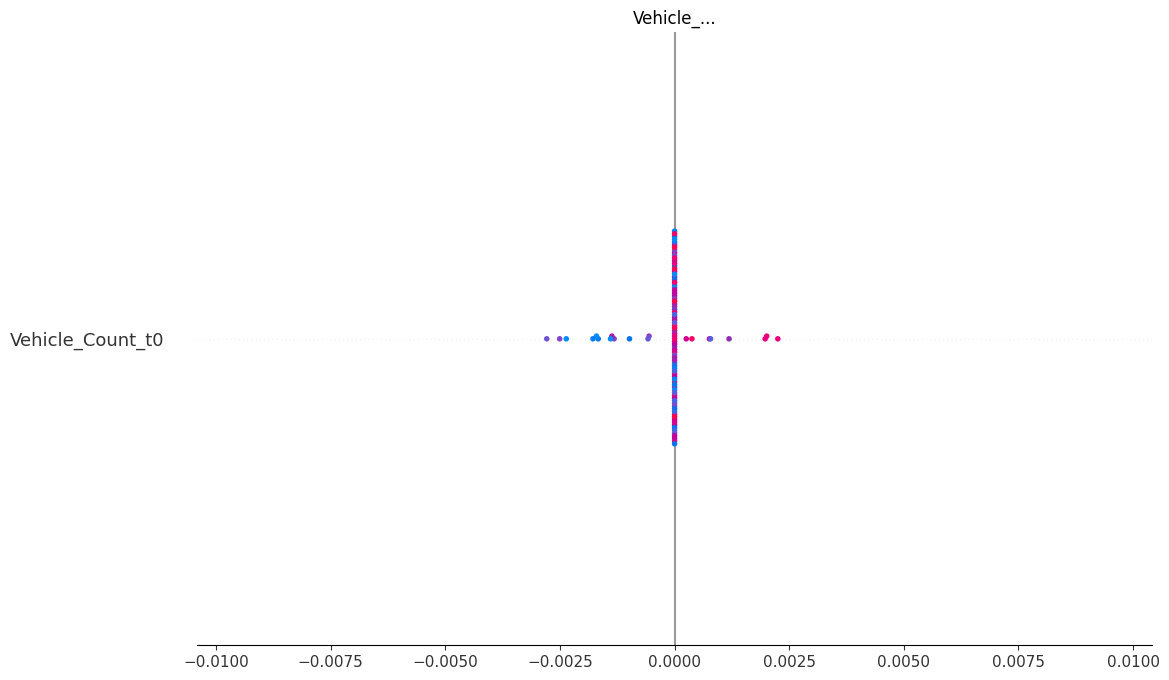

In [20]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# ❗ Use the same model and scaled features from your training pipeline
# X: the final input sequence data (after create_sequences)
# model: your trained LSTM model
# features: list of feature column names

# Select a small batch of data (10–100 rows)
X_explain = X[:100]  # X shape: (samples, timesteps, features)

# Since SHAP expects 2D input, flatten time-series
X_explain_flat = X_explain.reshape(X_explain.shape[0], -1)

# Wrap model.predict to work with 2D inputs
def model_predict_flat(x):
    x_reshaped = x.reshape((x.shape[0], 10, len(features)))  # adjust 10 if your lookback is different
    return model.predict(x_reshaped)

# KernelExplainer setup
explainer = shap.KernelExplainer(model_predict_flat, X_explain_flat)
shap_values = explainer.shap_values(X_explain_flat, nsamples=100)

# Plot
shap.summary_plot(shap_values, X_explain_flat, feature_names=[f"{f}_t{i}" for i in range(10) for f in features])
